<div style="text-align: right">INFO 6105 Data Sci Engineering Methods and Tools, Lecture 4 Day 1</div>
<div style="text-align: right">Prof. Dino Konstantopoulos, 23 September 2019</div>

# Data Wrangling with Pandas & more with friends-of-pandas

`pandas` is a Python package providing fast, flexible, and expressive data structures designed to work with relational or labeled (hierarchical) data or both. It is a fundamental high-level building block for doing practical, real world, **scientific data analysis** in Python.

![Protein Strucure with Sugar](data/LysozymeRock.gif)

`pandas` is well suited for:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet

- Ordered and unordered (not necessarily fixed-frequency) *time series* (1D) data

- Arbitrary *matrix* (2 and higher D) data (homogeneously typed or heterogeneous) with row and column labels

- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

Key features are:

- Shape mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects

- Automatic and explicit data alignment: objects can be explicitly aligned to a set of labels, or the data can be aligned automatically

- Intuitive merging and joining of data sets

- Flexible reshaping and pivoting of data sets

- Robust IO tools for loading data from flat files, Excel files, databases, HDF5, etc.

- Build-in statistics and linear regressions, extensible with additional packages (e.g. statsmodels)

After this lecture, chances are you will never use Excel functions to analyze data anymore, and instead you will import your excel spreadsheet into a notebook and use pandas & friends for your data analysis :-) (ok, sometimes you might still use RStudio).


# 1. Introduction to pandas *Series*

pandas Series are **vectors**!

In [1]:
#Series Lab
import pandas as pd

In [4]:
obj = pd.Series([10,20,30,40,50])
obj

0    10
1    20
2    30
3    40
4    50
dtype: int64

Do you see how the series automatically gets its own index?

In [5]:
obj.values

array([10, 20, 30, 40, 50], dtype=int64)

In [6]:
obj.index

RangeIndex(start=0, stop=5, step=1)

We can also specify an index that we pick:

In [11]:
obj = pd.Series([10,20,30,40,50], index = ['a', 'b', 'c', 'd', 'e'])
obj

a    10
b    20
c    30
d    40
e    50
dtype: int64

We can query data with predicates as index:

In [12]:
obj[obj > 20]

c    30
d    40
e    50
dtype: int64

We can analyze games, too:

In [2]:
nba = {'Celtics': 3, "Warriors": 4}
data = pd.Series(nba)
data

Celtics     3
Warriors    4
dtype: int64

Hmm.. I think we need more than one dimension to analyze the NBA. Once we increase the number of dimensions, we move on pandas' `DataFrame`:

# 2. Introduction to pandas *DataFrames*

pandas dataframes are excel spreadsheets, also known mathematically as **matrices**!

Let's import data as a dictionary structure:

In [3]:
nba = {"east": ['Celtics', "Cavs", "76ers"], "west": ["Warriors", "Lakers", "Chicago"]}
nbadf = pd.DataFrame(nba)
nbadf

,east,west
0,Celtics,Warriors
1,Cavs,Lakers
2,76ers,Chicago


In [4]:
# But does this work?
nba = {"east": ['Celtics', "Cavs"], "west": ["Warriors", "Lakers", "Chicago"]}
nbadf = pd.DataFrame(nba)
nbadf


ValueError: arrays must all be same length

Oh no! What to do?

In [20]:
# ..so do this instead, and pandas adds 'None' or 'NaN' where data's missing
nbadf = pd.DataFrame.from_dict(nba, orient='index')
nbadf

,0,1,2
east,Celtics,Cavs,None
west,Warriors,Lakers,Chicago


In [25]:
nbadf.loc['east']

0    Celtics
1       Cavs
2       None
Name: east, dtype: object

If we add dictionaries as the data itself, this gives pandas the opportunity to add data-specified indexes as rows and columns:

In [5]:
nba2 = {"east": {'MA': 'Celtics', 'IN': "Cavs"}, "west": {"CA": "Warriors", "CAS": "Lakers", "IL": "Chicago"}}
nbadf = pd.DataFrame(nba2)
nbadf

,east,west
CA,NaN,Warriors
CAS,NaN,Lakers
IL,NaN,Chicago
IN,Cavs,NaN
MA,Celtics,NaN


In [6]:
nbadf.T

,CA,CAS,IL,IN,MA
east,NaN,NaN,NaN,Cavs,Celtics
west,Warriors,Lakers,Chicago,NaN,NaN


In [7]:
nbadf.columns

Index(['east', 'west'], dtype='object')

In [8]:
nbadf.index

Index(['CA', 'CAS', 'IL', 'IN', 'MA'], dtype='object')

Let's reindex:

In [11]:
obj2 = nbadf.reindex(['MA', 'IN', 'IL', 'CA', 'CAS'])
obj2

,east,west
MA,Celtics,NaN
IN,Cavs,NaN
IL,NaN,Chicago
CA,NaN,Warriors
CAS,NaN,Lakers


Can we work with data independently of indexes? Yes, using **numpy matrices**!

Let's use python's `arange` to create a range of numbers, and `reshape` to shape the dimensions of our dataset:

In [13]:
import numpy as np
nba3 = np.arange(0,9).reshape(3,3)
nba3

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

And let's attach the data to rows and columns to give it a context!

In [39]:
nbadf3 = pd.DataFrame(nba3, index=['MA', 'NY', 'TX'], columns=['Celtics', 'Knicks', 'Rockets'])
nbadf3

,Celtics,Knicks,Rockets
MA,0,1,2
NY,3,4,5
TX,6,7,8


In [105]:
# this looks.. fake. Let's use random number generator in matrix to make the data look more real!
nbadf3 = pd.DataFrame(np.random.randn(3,3), index=['MA', 'NY', 'TX'], columns=['Celtics', 'Knicks', 'Rockets'])
nbadf3

,Celtics,Knicks,Rockets
MA,-0.170484,0.099611,1.665227
NY,0.241984,1.406651,1.821003
TX,0.020018,0.034160,-1.083344


How do we apply math formulas to the data like we do it in excel?

In [42]:
# formula as lambda
f = lambda x: x.max() - x.min()
nbadf3.apply(f)

Celtics    1.614848
Knicks     0.711086
Rockets    2.077700
dtype: float64

In [43]:
nbadf3.apply(f, axis = 'columns')

MA    1.851380
NY    2.753181
TX    0.679474
dtype: float64

# 3. Finance with pandas

So, finance is so cool, now that you know how to manipulate notebooks, to discover that your can do all your financial strategizing from within a notebook with the help of pandas, that I cannot *not show* you how to do this!

In [15]:
# better do this in an anaconda terminal on windows or bash shell on mac
!conda install pandas_datareader

Solving environment: ...working... failed


Error in sitecustomize; set PYTHONVERBOSE for traceback:
AttributeError: module 'sys' has no attribute 'setdefaultencoding'
d:\Anaconda3.5.1\lib\site-packages\requests\__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)

PackagesNotFoundError: The following packages are not available from current channels:

  - pandas_datareader

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/free/win-64
  - https://repo.anaconda.com/pkgs/free/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/pro/win-64
  - https://repo.anaconda.com/pkgs/pro/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navig

In [16]:
# better do this in an anaconda terminal on windows or bash shell on mac
!pip install pandas_datareader

  Found existing installation: urllib3 1.24.1
    Uninstalling urllib3-1.24.1:
      Successfully uninstalled urllib3-1.24.1


Error in sitecustomize; set PYTHONVERBOSE for traceback:
AttributeError: module 'sys' has no attribute 'setdefaultencoding'
You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [17]:
#from pandas_datareader import data, wb
import pandas as pd
# the line below is the fix for is_list_like lub
pd.core.common.is_list_like = pd.api.types.is_list_like

import pandas_datareader as web
import datetime
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2017, 1, 30)
aapl = web.DataReader('AAPL', 'iex', start, end)
aapl.head()

,open,high,low,close,volume
date,,,,,
2016-01-04,96.9111,99.5159,96.3350,99.4989,67649387
2016-01-05,99.8767,99.9711,96.7222,97.0055,55790992
2016-01-06,94.9749,96.6844,94.3233,95.1072,68457388
2016-01-07,93.1993,94.5688,91.0743,91.0932,81094428
2016-01-08,93.0766,93.6055,91.3860,91.5749,70798016


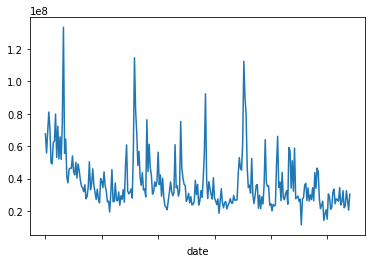

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
vol = aapl['volume']
vol.plot()

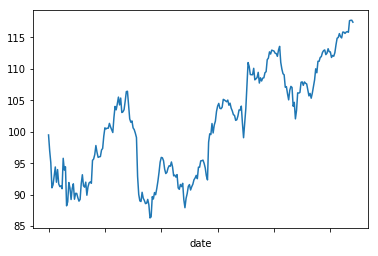

In [19]:
close = aapl['close']
close.plot()

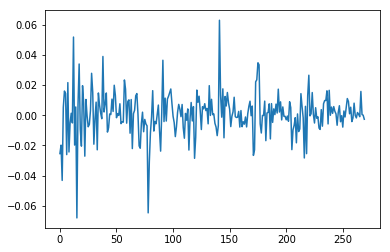

In [20]:
import numpy as np
returns = np.diff(np.log(close))
plt.plot(returns)

In [21]:
vol.corr(close)
# a value of 0.3 essentially means little correlation..

-0.34242621791083355

Wow, I can analyze the stock market with pandas, numpy, and matplotlib!

Yes, for free! Or you can pay lots of money to Fidelity Investments, who will turn to their programmers to give you the same tools you can use in a python notebook!

# 4. Interactive learning with pandas

If you think  that your python professor really sucks, then you can google for good python videos on youtube, view them in a notebook, and do the computations while the instructor is talking!

Now that's what I call **accelerated learning**! Here are some cool ones on **Python**, mixing *motivation* with *deep content*.

By the way, that is also how scientific papers should be ***written***, with code up on github, active code within the notebook in cells that demonstrate your basic proofs, and detailed experiment setup up on youtube videos, referenced in the paper!

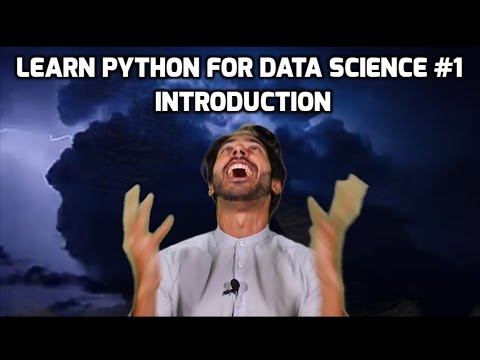

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('T5pRlIbr6gg')

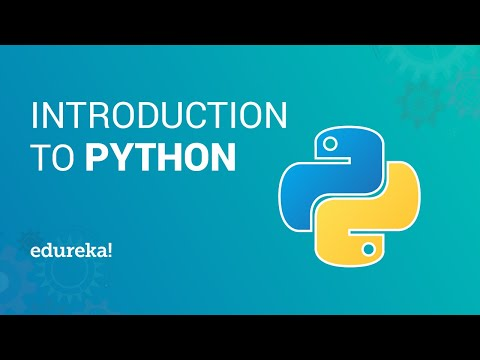

In [3]:
YouTubeVideo('uYjRzbP5aZs')

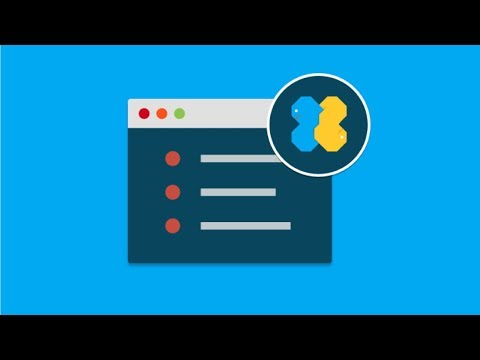

In [4]:
YouTubeVideo('7lmCu8wz8ro')

And here for **pandas**:

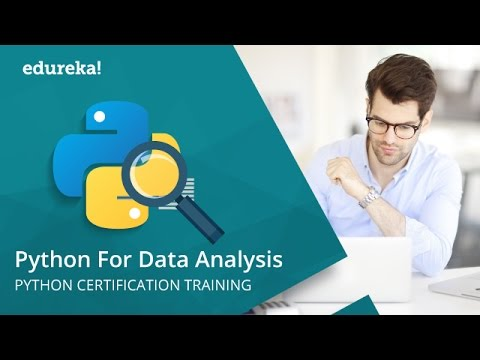

In [5]:
YouTubeVideo('B42n3Pc-N2A')

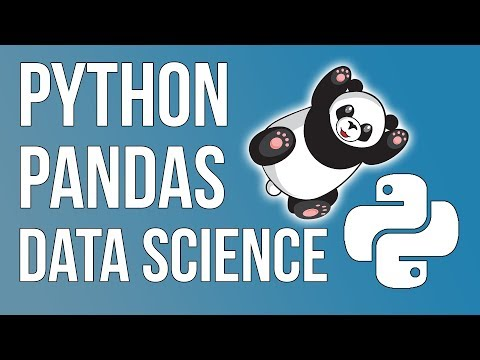

In [6]:
YouTubeVideo('vmEHCJofslg')

And here's one if you like, *like me*, to sing karaoke in chinese (也 你 爱  韩红）:

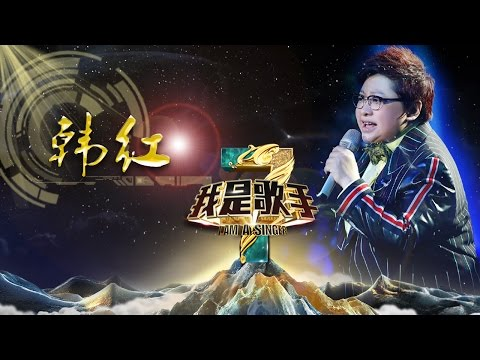

In [7]:
YouTubeVideo('npQSre0yLSI')

 I add all songs in my chinese repertoire in a python notebook, keep the music (in pinyin) and notes underneath (even download python DAW programs and run them in my notebook), and review all material, all quite interactively!

# 5. Data aggregation & pivoting with pandas

Let's load some gaming data and do *very basic* statistical analysis. This should start to remind you of your **R** homework.

This is a *very* famous dataset, many python classes use it as an example, like our iris flower dataset in R.

In [26]:
df = pd.read_csv('data/pokemon_data.csv')
df.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


Reindex:

In [27]:
df2 = df.sort_values(['Type 1', 'HP'])
df2.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
316,292,Shedinja,Bug,Ghost,1,90,45,30,30,40,3,False
230,213,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
462,415,Combee,Bug,Flying,30,30,42,30,42,70,4,False
603,543,Venipede,Bug,Poison,30,45,59,30,39,57,5,False
314,290,Nincada,Bug,Ground,31,45,90,30,30,40,3,False
51,46,Paras,Bug,Grass,35,70,55,45,55,25,1,False
446,401,Kricketot,Bug,NaN,37,25,41,25,41,25,4,False
732,664,Scatterbug,Bug,NaN,38,35,40,27,25,35,6,False
16,13,Weedle,Bug,Poison,40,35,30,20,20,50,1,False
179,165,Ledyba,Bug,Flying,40,20,30,40,80,55,2,False


Add a column:

In [29]:
df['Total'] = df.iloc[:, 4:10].sum(axis=1)
df.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,405
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,534
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False,314


Rearrange columns:

In [73]:
cols = list(df.columns)
df = df[cols[0:4] + [cols[-1]]+cols[4:12]]
df.head(10)

,YEAR,SUNACTIVITY,SUNACTIVITY
0,1700.0,5.0,5.0
1,1701.0,11.0,11.0
2,1702.0,16.0,16.0
3,1703.0,23.0,23.0
4,1704.0,36.0,36.0
5,1705.0,58.0,58.0
6,1706.0,29.0,29.0
7,1707.0,20.0,20.0
8,1708.0,10.0,10.0
9,1709.0,8.0,8.0


Wow, better than excel!

In fact, let's save our data as a spreadsheet:

In [32]:
df.to_excel('data/pokemon.xlsx', index=False)

Let's filer our data:

In [82]:
df3 = df.loc[(df['Type 1'] == 'Grass') & (df['Type 2'] == 'Poison') & (df['HP'] > 70)]
df3.reset_index(drop=True, inplace=True)
df3

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
1,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
2,45,Vileplume,Grass,Poison,75,80,85,110,90,50,1,False
3,71,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False
4,591,Amoonguss,Grass,Poison,114,85,70,85,80,30,5,False


Let's do aggreate statistics with GROUP_BY:

In [44]:
df4 = df.groupby(['Type 1', 'Type 2']).count()
df4.head(20)

#  Name  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
Type 1 Type 2                                                             
Bug    Electric   2     2      2   2       2        2        2        2   
       Fighting   2     2      2   2       2        2        2        2   
       Fire       2     2      2   2       2        2        2        2   
       Flying    14    14     14  14      14       14       14       14   
       Ghost      1     1      1   1       1        1        1        1   
       Grass      6     6      6   6       6        6        6        6   
       Ground     2     2      2   2       2        2        2        2   
       Poison    12    12     12  12      12       12       12       12   
       Rock       3     3      3   3       3        3        3        3   
       Steel      7     7      7   7       7        7        7        7   
       Water      1     1      1   1       1        1        1        1   
Dark   Dragon     3     3      3   3       3        3        3        3   
       Fighting   2     2      2   2       2        2        2        2   
       Fire       3     3      3   3       3        3        3        3   
       Flying     5     5      5   5       5        5        5        5   
       Ghost      2     2      2   2       2        2        2        2   
       Ice        2     2      2   2       2        2        2        2   
       Psychic    2     2      2   2       2        2        2        2   
       Steel      2     2      2   2       2        2        2        2   
Dragon Electric   1     1      1   1       1        1        1        1   

                 Speed  Generation  Legendary  
Type 1 Type 2                                  
Bug    Electric      2           2          2  
       Fighting      2           2          2  
       Fire          2           2          2  
       Flying       14          14         14  
       Ghost         1           1          1  
       Grass         6           6          6  
       Ground        2           2          2  
       Poison       12          12         12  
       Rock          3           3          3  
       Steel         7           7          7  
       Water         1           1          1  
Dark   Dragon        3           3          3  
       Fighting      2           2          2  
       Fire          3           3          3  
       Flying        5           5          5  
       Ghost         2           2          2  
       Ice           2           2          2  
       Psychic       2           2          2  
       Steel         2           2          2  
Dragon Electric      1           1          1

In [43]:
df4 = df.groupby(['Type 1', 'Type 2']).sum()
df4.head(20)

#  Total   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
Type 1 Type 2                                                                 
Bug    Electric  1191    791  120     124      110      154      110    173   
       Fighting   428   1100  160     310      190       80      200    160   
       Fire      1273    910  140     145      120      185      160    160   
       Flying    4008   5873  882     982      862     1020      967   1160   
       Ghost      292    236    1      90       45       30       30     40   
       Grass     2129   2304  330     443      460      344      460    267   
       Ground     703    690   91     124      195       89      115     76   
       Poison    2390   4175  645     820      697      510      712    791   
       Rock      1328   1305  140     170      440      110      340    105   
       Steel     2912   3568  474     803      787      477      583    444   
       Water      283    269   40      30       32       50       52     65   
Dark   Dragon    1902   1320  216     255      210      235      210    194   
       Fighting  1119    836  115     165      185       80      185    106   
       Fire       686   1430  195     240      170      330      220    275   
       Flying    2604   2470  466     461      369      421      352    401   
       Ghost      604    860  100     160      200      150      180     70   
       Ice        676    940  125     215      120       80      160    240   
       Psychic   1373    770  139     146      141      105      121    118   
       Steel     1249    830  110     210      170      100      110    130   
Dragon Electric   644    680  100     150      120      120      100     90   

                 Generation  Legendary  
Type 1 Type 2                           
Bug    Electric          10        0.0  
       Fighting           4        0.0  
       Fire              10        0.0  
       Flying            40        0.0  
       Ghost              3        0.0  
       Grass             21        0.0  
       Ground             7        0.0  
       Poison            28        0.0  
       Rock              12        0.0  
       Steel             25        0.0  
       Water              3        0.0  
Dark   Dragon            15        0.0  
       Fighting          10        0.0  
       Fire               6        0.0  
       Flying            22        1.0  
       Ghost              6        0.0  
       Ice                6        0.0  
       Psychic           12        0.0  
       Steel             10        0.0  
Dragon Electric           5        1.0

In [50]:
df4 = df.groupby(['Type 1', 'Type 2']).mean()
df4.head(20)

#       Total          HP      Attack     Defense  \
Type 1 Type 2                                                                 
Bug    Electric  595.500000  395.500000   60.000000   62.000000   55.000000   
       Fighting  214.000000  550.000000   80.000000  155.000000   95.000000   
       Fire      636.500000  455.000000   70.000000   72.500000   60.000000   
       Flying    286.285714  419.500000   63.000000   70.142857   61.571429   
       Ghost     292.000000  236.000000    1.000000   90.000000   45.000000   
       Grass     354.833333  384.000000   55.000000   73.833333   76.666667   
       Ground    351.500000  345.000000   45.500000   62.000000   97.500000   
       Poison    199.166667  347.916667   53.750000   68.333333   58.083333   
       Rock      442.666667  435.000000   46.666667   56.666667  146.666667   
       Steel     416.000000  509.714286   67.714286  114.714286  112.428571   
       Water     283.000000  269.000000   40.000000   30.000000   32.000000   
Dark   Dragon    634.000000  440.000000   72.000000   85.000000   70.000000   
       Fighting  559.500000  418.000000   57.500000   82.500000   92.500000   
       Fire      228.666667  476.666667   65.000000   80.000000   56.666667   
       Flying    520.800000  494.000000   93.200000   92.200000   73.800000   
       Ghost     302.000000  430.000000   50.000000   80.000000  100.000000   
       Ice       338.000000  470.000000   62.500000  107.500000   60.000000   
       Psychic   686.500000  385.000000   69.500000   73.000000   70.500000   
       Steel     624.500000  415.000000   55.000000  105.000000   85.000000   
Dragon Electric  644.000000  680.000000  100.000000  150.000000  120.000000   

                    Sp. Atk     Sp. Def       Speed  Generation  Legendary  
Type 1 Type 2                                                               
Bug    Electric   77.000000   55.000000   86.500000    5.000000        0.0  
       Fighting   40.000000  100.000000   80.000000    2.000000        0.0  
       Fire       92.500000   80.000000   80.000000    5.000000        0.0  
       Flying     72.857143   69.071429   82.857143    2.857143        0.0  
       Ghost      30.000000   30.000000   40.000000    3.000000        0.0  
       Grass      57.333333   76.666667   44.500000    3.500000        0.0  
       Ground     44.500000   57.500000   38.000000    3.500000        0.0  
       Poison     42.500000   59.333333   65.916667    2.333333        0.0  
       Rock       36.666667  113.333333   35.000000    4.000000        0.0  
       Steel      68.142857   83.285714   63.428571    3.571429        0.0  
       Water      50.000000   52.000000   65.000000    3.000000        0.0  
Dark   Dragon     78.333333   70.000000   64.666667    5.000000        0.0  
       Fighting   40.000000   92.500000   53.000000    5.000000        0.0  
       Fire      110.000000   73.333333   91.666667    2.000000        0.0  
       Flying     84.200000   70.400000   80.200000    4.400000        0.2  
       Ghost      75.000000   90.000000   35.000000    3.000000        0.0  
       Ice        40.000000   80.000000  120.000000    3.000000        0.0  
       Psychic    52.500000   60.500000   59.000000    6.000000        0.0  
       Steel      50.000000   55.000000   65.000000    5.000000        0.0  
Dragon Electric  120.000000  100.000000   90.000000    5.000000        1.0

In [51]:
df5 = df4.head(20)[cols[4:7]]
df5

HP      Attack     Defense
Type 1 Type 2                                      
Bug    Electric   60.000000   62.000000   55.000000
       Fighting   80.000000  155.000000   95.000000
       Fire       70.000000   72.500000   60.000000
       Flying     63.000000   70.142857   61.571429
       Ghost       1.000000   90.000000   45.000000
       Grass      55.000000   73.833333   76.666667
       Ground     45.500000   62.000000   97.500000
       Poison     53.750000   68.333333   58.083333
       Rock       46.666667   56.666667  146.666667
       Steel      67.714286  114.714286  112.428571
       Water      40.000000   30.000000   32.000000
Dark   Dragon     72.000000   85.000000   70.000000
       Fighting   57.500000   82.500000   92.500000
       Fire       65.000000   80.000000   56.666667
       Flying     93.200000   92.200000   73.800000
       Ghost      50.000000   80.000000  100.000000
       Ice        62.500000  107.500000   60.000000
       Psychic    69.500000   73.000000   70.500000
       Steel      55.000000  105.000000   85.000000
Dragon Electric  100.000000  150.000000  120.000000

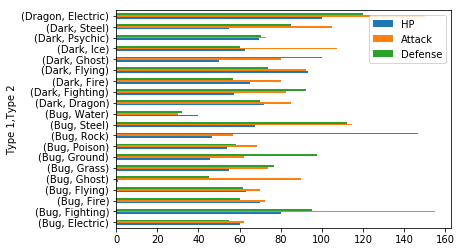

In [52]:
df5.plot(kind='barh')

In [54]:
zscore = lambda x: (x - x.mean()) / x.std()
df5.apply(zscore)

HP    Attack   Defense
Type 1 Type 2                                
Bug    Electric -0.017866 -0.789752 -0.841476
       Fighting  0.956942  2.333057  0.595768
       Fire      0.469538 -0.437177 -0.661821
       Flying    0.128355 -0.516327 -0.605358
       Ghost    -2.893547  0.150448 -1.200787
       Grass    -0.261567 -0.392406 -0.062969
       Ground   -0.724601 -0.789752  0.685595
       Poison   -0.322493 -0.577088 -0.730689
       Rock     -0.667737 -0.968838  2.452208
       Steel     0.358131  0.980319  1.221995
       Water    -0.992673 -1.864267 -1.667892
Dark   Dragon    0.567019 -0.017445 -0.302510
       Fighting -0.139717 -0.101391  0.505940
       Fire      0.225836 -0.185338 -0.781591
       Flying    1.600314  0.224321 -0.165972
       Ghost    -0.505269 -0.185338  0.775423
       Ice       0.103985  0.738073 -0.661821
       Psychic   0.445168 -0.420388 -0.284544
       Steel    -0.261567  0.654127  0.236457
Dragon Electric  1.931749  2.165164  1.494045

# 6. Statistics with pandas & friends

`statsmodels` is a cool statistics library that also includes sample datasets for us to play with. Now *that's* accelerated learning!

In [56]:
import statsmodels.api as sm
data_loader = sm.datasets.sunspots.load_pandas()
df = data_loader.data
df.head(10)

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
5,1705.0,58.0
6,1706.0,29.0
7,1707.0,20.0
8,1708.0,10.0
9,1709.0,8.0


In [57]:
df.tail(10)

,YEAR,SUNACTIVITY
299,1999.0,93.3
300,2000.0,119.6
301,2001.0,111.0
302,2002.0,104.0
303,2003.0,63.7
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5
308,2008.0,2.9


Wow, that's sunspots data, from the 18th century to.. 2008! in fact, Galileo first documented sunspots in the 1600s, using his newly invented telescope, and reliable sunspot observations begin in about 1700.

When did fractional years start appearing? Take the modulo of each value with 1 to get the fractional part (lambda x: x % 1), using the `.apply()` API on the `df['SUNACTIVITY']` column. 

In [58]:
fractional_nums = df['SUNACTIVITY'].apply(lambda x: x % 1) #Take the modulo of each value with 1 to get the fractional part
fractional_nums[fractional_nums > 0].head()

49    0.9
50    0.4
51    0.7
52    0.8
53    0.7
Name: SUNACTIVITY, dtype: float64

Get a sense of the distribution of the values:

In [59]:
df['SUNACTIVITY'].describe()

count    309.000000
mean      49.752104
std       40.452595
min        0.000000
25%       16.000000
50%       40.000000
75%       69.800000
max      190.200000
Name: SUNACTIVITY, dtype: float64

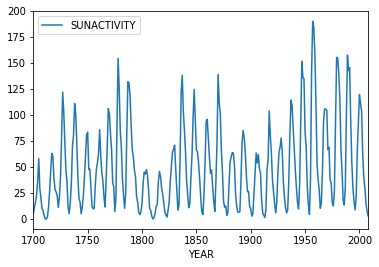

In [60]:
df.plot(x='YEAR', y='SUNACTIVITY', xlim=(1700,2008))

Looks like there's a cycle (increase --> decrease --> increase --> decrease --> etc.) going on. What's its period?

d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


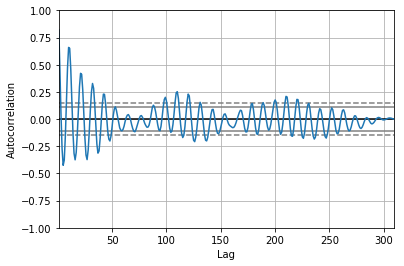

In [61]:
pd.tools.plotting.autocorrelation_plot(df['SUNACTIVITY'])

If we were in a data science class, I would ask you to fit a (theoretical) model to the data. Instead, I just want to show you the power of `pandas` and friends (`numpy`, `scipy`, `statsmodels`, `matplotlib`, ..) in doing science with just a few lines of code:

In [64]:
print(df.shape)
N2 = df.shape[0] / 2
freqs = np.linspace(0, 0.5, num=N2, endpoint=False)[1:] #Nyquist range

(309, 2)


d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


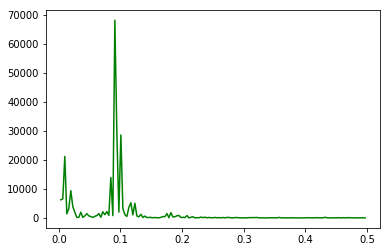

In [65]:
import scipy as sp
periodogram = sp.signal.lombscargle(df['YEAR'], df['SUNACTIVITY'], freqs * 2 * np.pi)
plt.plot(freqs, periodogram, color='green')

In [67]:
freq_index_at_max_power = np.argmax(periodogram)
print('Frequency and corresponding time in years at max power: %.2f, %.1f' % (freqs[freq_index_at_max_power], 1 / freqs[freq_index_at_max_power]))

Frequency and corresponding time in years at max power: 0.09, 11.0


So the major cycle is about 11 years, and the minor cycle at a just over a month.

Wow, correlation is really cool. It allows us to find patterns and dependencies in data. In fact, it's the underlying paradigm in Machine Learning. 

Can we find any correlations in our gaming data above?

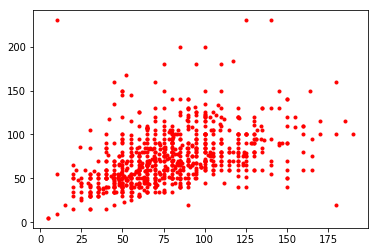

In [74]:
df = pd.read_csv('data/pokemon_data.csv')
attack = df['Attack']
defense = df['Defense']
plt.plot(attack, defense, 'r.')

How about for really good players?

In [85]:
df_g = df.loc[(df['Speed'] > 60) & (df['HP'] > 70)]
df_g.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
11,9,Blastoise,Water,NaN,79,83,100,85,105,78,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,79,103,120,135,115,78,1,False
22,18,Pidgeot,Normal,Flying,83,80,75,70,70,101,1,False
23,18,PidgeotMega Pidgeot,Normal,Flying,83,80,80,135,80,121,1,False
33,28,Sandslash,Ground,NaN,75,100,110,45,55,65,1,False


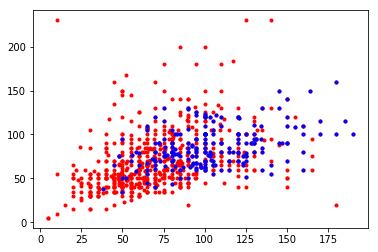

In [94]:
attack_g = df_g['Attack']
defense_g = df_g['Defense']
plt.plot(attack, defense, 'r.', label='all')
plt.plot(attack_g, defense_g, 'b.', label='good')

Outliers can really ***skew*** your data. We need a way to find out if there are outliers in our data, remove them, and then look again at correlations!

In [107]:
# make a copy of original df
newdf = df.copy()

newdf['x-Mean'] = abs(newdf['Attack'] - newdf['Attack'].mean())
newdf['1.96*std'] = 1.96*newdf['Attack'].std()  
newdf['Outlier'] = abs(newdf['Attack'] - newdf['Attack'].mean()) > 1.96*newdf['Attack'].std()
newdf.loc[(newdf['Outlier'] == True)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,x-Mean,1.96*std,Outlier
19,15,BeedrillMega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,70.99875,63.616437,True
121,113,Chansey,Normal,NaN,250,5,5,35,105,50,1,False,74.00125,63.616437,True
137,127,PinsirMega Pinsir,Bug,Flying,65,155,120,65,90,105,1,False,75.99875,63.616437,True
139,129,Magikarp,Water,NaN,20,10,55,15,20,80,1,False,69.00125,63.616437,True
141,130,GyaradosMega Gyarados,Water,Dark,95,155,109,70,130,81,1,False,75.99875,63.616437,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,110.99875,63.616437,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,70.99875,63.616437,True
229,212,ScizorMega Scizor,Bug,Steel,70,150,140,65,100,75,2,False,70.99875,63.616437,True
230,213,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,69.00125,63.616437,True
232,214,HeracrossMega Heracross,Bug,Fighting,80,185,115,40,105,75,2,False,105.99875,63.616437,True


In [110]:
!pip install prettypandas

  Running setup.py bdist_wheel for prettypandas: started
  Running setup.py bdist_wheel for prettypandas: finished with status 'done'
  Stored in directory: C:\Users\Dino\AppData\Local\pip\Cache\wheels\64\d7\40\8ef47e2709290e78f521aa91afb480758ce3d1b12881cc2f29
Successfully built prettypandas


Error in sitecustomize; set PYTHONVERBOSE for traceback:
AttributeError: module 'sys' has no attribute 'setdefaultencoding'
You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [111]:
from prettypandas import PrettyPandas
PrettyPandas(newdf                                   # Prettyprints pandas dataframes
    .head(10)                                    # Sample the first 10 rows
    [[c for c in newdf.columns if "Sp." not in c]] # Ignore columns with "Sp." in the name (don't know what it means)
)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Speed,Generation,Legendary,x-Mean,1.96*std,Outlier
0,1,Bulbasaur,Grass,Poison,45,49,49,45,1,False,30.0012,63.6164,False
1,2,Ivysaur,Grass,Poison,60,62,63,60,1,False,17.0012,63.6164,False
2,3,Venusaur,Grass,Poison,80,82,83,80,1,False,2.99875,63.6164,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,80,1,False,20.9988,63.6164,False
4,4,Charmander,Fire,nan,39,52,43,65,1,False,27.0012,63.6164,False
5,5,Charmeleon,Fire,nan,58,64,58,80,1,False,15.0012,63.6164,False
6,6,Charizard,Fire,Flying,78,84,78,100,1,False,4.99875,63.6164,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,100,1,False,50.9988,63.6164,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,100,1,False,24.9988,63.6164,False
9,7,Squirtle,Water,nan,44,48,65,43,1,False,31.0012,63.6164,False


In [114]:
PrettyPandas(newdf[newdf["Attack"]>=180])

d:\Anaconda3.5.1\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,x-Mean,1.96*std,Outlier
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,110.999,63.6164,True
232,214,HeracrossMega Heracross,Bug,Fighting,80,185,115,40,105,75,2,False,105.999,63.6164,True
424,383,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,3,True,100.999,63.6164,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True,100.999,63.6164,True
429,386,DeoxysAttack Forme,Psychic,nan,50,180,20,180,20,150,3,True,100.999,63.6164,True


In [101]:
# make a copy of original df
newdf2 = df.copy()

Attack = newdf.groupby('Attack')

newdf['Outlier'] = Attack.transform( lambda x: abs(x-x.mean()) > 1.96*x.std() )
newdf['x-Mean'] = Attack.transform( lambda x: abs(x-x.mean()) )
newdf['1.96*std'] = Attack.transform( lambda x: 1.96*x.std() )
newdf.loc[(newdf['Outlier'] == True)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,x-Mean,1.96*std,Outlier
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,395.250000,393.312949,True
710,646,Kyurem,Dragon,Ice,125,130,90,130,90,95,5,True,382.428571,353.286912,True
732,664,Scatterbug,Bug,NaN,38,35,40,27,25,35,6,False,411.230769,377.883861,True
778,708,Phantump,Ghost,Grass,43,70,48,50,60,38,6,False,393.548387,376.686926,True
784,711,GourgeistAverage Size,Ghost,Grass,65,90,122,58,75,84,6,False,394.233333,374.068375,True
791,715,Noivern,Flying,Dragon,85,70,80,97,80,123,6,False,400.548387,376.686926,True


But Average and Standard Deviation are only valid for gaussian distributions!

In [104]:
# make a copy of original df
newdf3 = df.copy()

Attack = newdf3.groupby('Attack')

newdf3['Lower'] = Attack['Attack'].transform( lambda x: x.quantile(q=.25) - (1.5*(x.quantile(q=.75)-x.quantile(q=.25))) )
newdf3['Upper'] = Attack['Attack'].transform( lambda x: x.quantile(q=.75) + (1.5*(x.quantile(q=.75)-x.quantile(q=.25))) )
newdf3['Outlier'] = (newdf3['Attack'] < newdf3['Lower']) | (newdf3['Attack'] > newdf3['Upper']) 
newdf3.loc[(newdf3['Outlier'] == True)]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Lower,Upper,Outlier


### Histograms

[Histograms](https://en.wikipedia.org/wiki/Histogram) are essential to data science, because you understand the **distribution** of your datasets. Understanding how your data is distributed is **key** to being able to fit it to a **model**.

[Here](https://www.mathsisfun.com/data/quincunx.html) is how histograms are built.

A model for your data is a function that ***autoencodes your data***. In other words, it is able to learn from your data ***and*** be able to output your data given a much smaller input. That way, you ***keep your model and you can throw away the data***.

Your brain is, in fact, a ***model builder***. It learns all your past interactions between you and your parents, brother, husband, best friend, etc., and enables you to sidestep all future conflict (well, for some of us, our brain does *not* work that well ;-). How does it do that? Given the input of a potentially conflict-causing conditions, it is able to ***predict*** the future conflict, and thus devise strategies to avoid this cascading development. *That* is why humans have conquered the planet. They are ***best*** at dong this.

What's your most basic example of a ***model***? We talked about this... Addition coroutine (generator) anyone?

So, let's plot histograms. `seaborn` is the \#2 visualization library, after `matplotlib`, but it has a great histogram API. 

d:\Anaconda3.5.1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Defense')

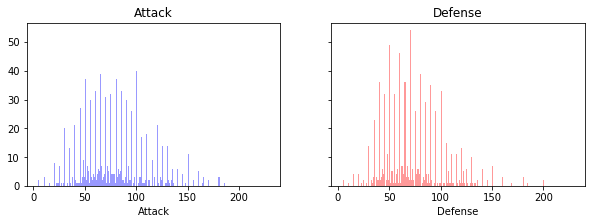

In [118]:
import seaborn as sns

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,3),sharey=True,sharex=True)
sns.distplot(newdf3["Attack"], ax=ax1,
             bins=range(newdf3["Attack"].min(), newdf3["Attack"].max()),
             kde=False,
             color="b")
ax1.set_title("Attack")
sns.distplot(newdf3["Defense"], ax=ax2,
             bins=range(newdf3["Defense"].min(), newdf3["Defense"].max()),
             kde=False,
             color="r")
ax2.set_title("Defense")

d:\Anaconda3.5.1\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


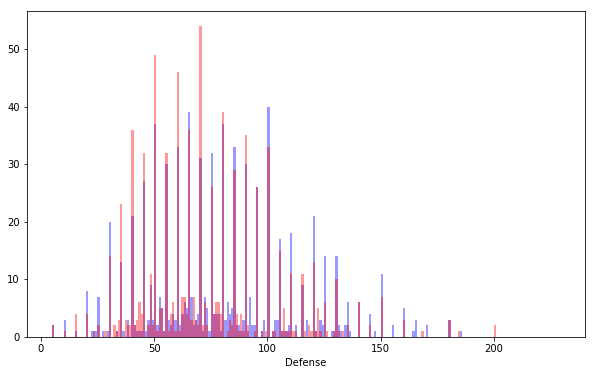

In [124]:
fig,ax1 = plt.subplots(nrows=1,figsize=(10,6),sharex=True)

# Plot the age distributions of males and females on the same axis
sns.distplot(newdf3["Attack"], ax=ax1,
             bins=range(newdf3["Attack"].min(), newdf3["Attack"].max()),
             kde=False,
             color="b",
             label="Attack")
sns.distplot(newdf3["Defense"], ax=ax1,
             bins=range(newdf3["Defense"].min(), newdf3["Defense"].max()),
             kde=False,
             color="r",
             label="Defense")

# 7. Matrix visualizations with pandas & friends

`Clustergrammer` is the ***coolest*** web-based tool for visualizing high-dimensional data (e.g. a matrix) as an interactive and shareable hierarchically clustered heatmap. Developed by the Ma'ayan lab at the Icahn School of Medicine In New York City. Clustergrammer's front end (Clustergrammer-JS) is built using [D3.js](https://d3js.org/) and its back-end (Clustergrammer-PY) is built using Python. Clustergrammer produces highly interactive visualizations that enable intuitive exploration of high-dimensional data and has several biology-specific features to facilitate the exploration of gene-level biological data.

Fernandez, N. F. et al. Clustergrammer, a web-based heatmap visualization and analysis tool for high-dimensional biological data. Sci. Data 4:170151 doi: [10.1038/sdata.2017.151 (2017)](https://www.nature.com/articles/sdata2017151).

In [127]:
!pip install clustergrammer_widget

  Running setup.py bdist_wheel for clustergrammer-widget: started
  Running setup.py bdist_wheel for clustergrammer-widget: finished with status 'done'
  Stored in directory: C:\Users\Dino\AppData\Local\pip\Cache\wheels\ca\c0\d6\34dedd777453899090ebcc4c3837fa45ad313329e360361ba7
Successfully built clustergrammer-widget


Error in sitecustomize; set PYTHONVERBOSE for traceback:
AttributeError: module 'sys' has no attribute 'setdefaultencoding'
You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [136]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Error in sitecustomize; set PYTHONVERBOSE for traceback:
AttributeError: module 'sys' has no attribute 'setdefaultencoding'
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok
Error in sitecustomize; set PYTHONVERBOSE for traceback:
AttributeError: module 'sys' has no attribute 'setdefaultencoding'


In [137]:
!jupyter nbextension enable --py --sys-prefix clustergrammer_widget

Error in sitecustomize; set PYTHONVERBOSE for traceback:
AttributeError: module 'sys' has no attribute 'setdefaultencoding'
Enabling notebook extension clustergrammer_widget/extension...
      - Validating: ok
Error in sitecustomize; set PYTHONVERBOSE for traceback:
AttributeError: module 'sys' has no attribute 'setdefaultencoding'


In [8]:
# import widget classes and instantiate Network instance
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [9]:
# import widget classes and instantiate Network instance
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

Let's create random data.

In [65]:
import numpy as np

# generate random matrix
num_rows = 10
num_cols = 10
np.random.seed(seed=100)
mat = np.random.rand(num_rows, num_cols)

# make row and col labels
rows = range(num_rows)
cols = range(num_cols)
rows = [str(i) for i in rows]
cols = [str(i) for i in cols]

# make dataframe 
df6 = pd.DataFrame(data=mat, columns=cols, index=rows)
df6

,0,1,2,3,4,5,6,7,8,9
0,0.543405,0.278369,0.424518,0.844776,0.004719,0.121569,0.670749,0.825853,0.136707,0.575093
1,0.891322,0.209202,0.185328,0.108377,0.219697,0.978624,0.811683,0.171941,0.816225,0.274074
2,0.431704,0.940030,0.817649,0.336112,0.175410,0.372832,0.005689,0.252426,0.795663,0.015255
3,0.598843,0.603805,0.105148,0.381943,0.036476,0.890412,0.980921,0.059942,0.890546,0.576901
4,0.742480,0.630184,0.581842,0.020439,0.210027,0.544685,0.769115,0.250695,0.285896,0.852395
5,0.975006,0.884853,0.359508,0.598859,0.354796,0.340190,0.178081,0.237694,0.044862,0.505431
6,0.376252,0.592805,0.629942,0.142600,0.933841,0.946380,0.602297,0.387766,0.363188,0.204345
7,0.276765,0.246536,0.173608,0.966610,0.957013,0.597974,0.731301,0.340385,0.092056,0.463498
8,0.508699,0.088460,0.528035,0.992158,0.395036,0.335596,0.805451,0.754349,0.313066,0.634037
9,0.540405,0.296794,0.110788,0.312640,0.456979,0.658940,0.254258,0.641101,0.200124,0.657625


In [66]:
net.load_df(df6)
net.cluster(enrichrgram=False)
net.widget()

clustergrammer_widget(network='{"row_nodes": [{"name": "0", "ini": 10, "clust": 3, "rank": 2, "rankvar": 5, "group": [3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "1", "ini": 9, "clust": 6, "rank": 4, "rankvar": 9, "group": [6.0, 5.0, 5.0, 5.0, 4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "2", "ini": 8, "clust": 0, "rank": 1, "rankvar": 7, "group": [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "3", "ini": 7, "clust": 7, "rank": 7, "rankvar": 8, "group": [7.0, 6.0, 5.0, 5.0, 4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "4", "ini": 6, "clust": 5, "rank": 6, "rankvar": 3, "group": [8.0, 7.0, 6.0, 6.0, 4.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "5", "ini": 5, "clust": 1, "rank": 3, "rankvar": 4, "group": [2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "6", "ini": 4, "clust": 8, "rank": 8, "rankvar": 2, "group": [9.0, 8.0, 7.0, 7.0, 5.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "7", "ini": 3, "clust": 2, "rank": 5, "rankvar": 6, "group": [5.0, 4.0, 4.0, 4.0, 3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "8", "ini": 2, "clust": 4, "rank": 9, "rankvar": 1, "group": [4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "9", "ini": 1, "clust": 9, "rank": 0, "rankvar": 0, "group": [10.0, 9.0, 8.0, 8.0, 5.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0]}], "col_nodes": [{"name": "0", "ini": 10, "clust": 3, "rank": 9, "rankvar": 0, "group": [3.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "1", "ini": 9, "clust": 0, "rank": 6, "rankvar": 5, "group": [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "2", "ini": 8, "clust": 1, "rank": 1, "rankvar": 1, "group": [2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "3", "ini": 7, "clust": 8, "rank": 4, "rankvar": 9, "group": [8.0, 8.0, 8.0, 4.0, 4.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "4", "ini": 6, "clust": 7, "rank": 0, "rankvar": 8, "group": [10.0, 10.0, 10.0, 5.0, 5.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "5", "ini": 5, "clust": 5, "rank": 7, "rankvar": 4, "group": [5.0, 5.0, 5.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "6", "ini": 4, "clust": 6, "rank": 8, "rankvar": 7, "group": [6.0, 6.0, 6.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "7", "ini": 3, "clust": 9, "rank": 2, "rankvar": 3, "group": [9.0, 9.0, 9.0, 4.0, 4.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "8", "ini": 2, "clust": 2, "rank": 3, "rankvar": 6, "group": [7.0, 7.0, 7.0, 3.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "9", "ini": 1, "clust": 4, "rank": 5, "rankvar": 2, "group": [4.0, 4.0, 4.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}], "links": [], "mat": [[0.5434049417909654, 0.27836938509379616, 0.4245175907491331, 0.8447761323199037, 0.004718856190972565, 0.12156912078311422, 0.6707490847267786, 0.8258527551050476, 0.13670658968495297, 0.57509332942725], [0.891321954312264, 0.20920212211718958, 0.18532821955007506, 0.10837689046425514, 0.21969749262499216, 0.9786237847073697, 0.8116831490893233, 0.1719410127325942, 0.8162247487258399, 0.2740737470416992], [0.4317041836631217, 0.9400298196223746, 0.8176493787767274, 0.3361119501208987, 0.17541045374233666, 0.37283204628992317, 0.005688507352573424, 0.25242635344484043, 0.7956625084732873, 0.01525497124633901], [0.5988433769284929, 0.6038045390428536, 0.10514768541205632, 0.38194344494311006, 0.03647605659256892, 0.8904115634420757, 0.9809208570123115, 0.05994198881803725, 0.8905459447285041, 0.5769014994000329], [0.7424796890979773, 0.6301839364753761, 0.5818421923987779, 0.020439132026923157, 0.2100265776728606, 0.5446848781786475, 0.7691151711056516, 0.2506952291383959, 0.2858956904068647, 0.8523950878413064], [0.9750064936065875, 0.8848532934911055, 0.35950784393690227, 0.5988589458757472, 0.3547956116572998, 0.34019021537064575, 0.17808098950580487, 0.23769420862405044, 0.04486228246077528, 0.5054314296357892], [0.376252454297363, 0.5928054009758866, 0.6299418755874974, 0.14260031444628352, 0.933841299466419, 0.94637988080910

Let's load real data.

In [67]:
# load matrix file
net.load_file('data/rc_two_cats.txt')

# cluster using default parameters
net.cluster(enrichrgram=True)

# make interactive widget
net.widget()

clustergrammer_widget(network='{"row_nodes": [{"name": "Gene: CDK4", "ini": 38, "clust": 14, "rank": 30, "rankvar": 20, "cat-0": "Gene Type: Interesting", "cat_0_index": 0, "group": [10.0, 9.0, 8.0, 5.0, 5.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "Gene: LMTK3", "ini": 37, "clust": 20, "rank": 28, "rankvar": 24, "cat-0": "Gene Type: Not Interesting", "cat_0_index": 17, "group": [21.0, 20.0, 19.0, 13.0, 11.0, 5.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "Gene: LRRK2", "ini": 36, "clust": 26, "rank": 9, "rankvar": 10, "cat-0": "Gene Type: Not Interesting", "cat_0_index": 18, "group": [26.0, 25.0, 22.0, 16.0, 13.0, 6.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "Gene: UHMK1", "ini": 35, "clust": 25, "rank": 26, "rankvar": 14, "cat-0": "Gene Type: Not Interesting", "cat_0_index": 19, "group": [28.0, 27.0, 24.0, 18.0, 14.0, 6.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "Gene: EGFR", "ini": 34, "clust": 13, "rank": 33, "rankvar": 7, "cat-0": "Gene Type: Interesting", "cat_0_index": 1, "group": [12.0, 11.0, 10.0, 5.0, 5.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "Gene: STK32A", "ini": 33, "clust": 32, "rank": 36, "rankvar": 32, "cat-0": "Gene Type: Interesting", "cat_0_index": 2, "group": [33.0, 32.0, 29.0, 22.0, 17.0, 8.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "Gene: NRK", "ini": 32, "clust": 15, "rank": 35, "rankvar": 33, "cat-0": "Gene Type: Interesting", "cat_0_index": 3, "group": [11.0, 10.0, 9.0, 5.0, 5.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "Gene: ERBB2", "ini": 31, "clust": 34, "rank": 24, "rankvar": 9, "cat-0": "Gene Type: Not Interesting", "cat_0_index": 20, "group": [35.0, 34.0, 31.0, 23.0, 18.0, 8.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "Gene: ERBB4", "ini": 30, "clust": 30, "rank": 6, "rankvar": 2, "cat-0": "Gene Type: Not Interesting", "cat_0_index": 21, "group": [31.0, 30.0, 27.0, 20.0, 16.0, 7.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "Gene: AAK1", "ini": 29, "clust": 36, "rank": 18, "rankvar": 8, "cat-0": "Gene Type: Not Interesting", "cat_0_index": 22, "group": [37.0, 36.0, 33.0, 25.0, 19.0, 8.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "Gene: SRPK3", "ini": 28, "clust": 4, "rank": 8, "rankvar": 15, "cat-0": "Gene Type: Not Interesting", "cat_0_index": 23, "group": [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "Gene: STK39", "ini": 27, "clust": 35, "rank": 7, "rankvar": 4, "cat-0": "Gene Type: Interesting", "cat_0_index": 4, "group": [36.0, 35.0, 32.0, 24.0, 18.0, 8.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "Gene: GRK4", "ini": 26, "clust": 3, "rank": 1, "rankvar": 3, "cat-0": "Gene Type: Not Interesting", "cat_0_index": 24, "group": [3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "Gene: TBK1", "ini": 25, "clust": 12, "rank": 34, "rankvar": 26, "cat-0": "Gene Type: Not Interesting", "cat_0_index": 25, "group": [13.0, 12.0, 11.0, 6.0, 5.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "Gene: INSRR", "ini": 24, "clust": 23, "rank": 13, "rankvar": 5, "cat-0": "Gene Type: Not Interesting", "cat_0_index": 26, "group": [23.0, 22.0, 20.0, 14.0, 12.0, 6.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "Gene: IRAK1", "ini": 23, "clust": 11, "rank": 20, "rankvar": 30, "cat-0": "Gene Type: Interesting", "cat_0_index": 5, "group": [14.0, 13.0, 12.0, 7.0, 6.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "Gene: KDR", "ini": 22, "clust": 33, "rank": 19, "rankvar": 11, "cat-0": "Gene Type: Not Interesting", "cat_0_index": 27, "group": [34.0, 33.0, 30.0, 22.0, 17.0, 8.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "Gene: NPR1", "ini": 21, "clust": 16, "rank": 27, "rankvar": 29, "cat-0": "Gene Type: Interesting", "cat_0_index": 6, "group": [20.0, 19.0, 18.0, 12.0, 10.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "Gene: PAK3", "ini": 20, "clust": 9, "rank": 11, "rankvar": 12, "cat-0": "Gene Type: Not Interesting", "cat_0_index": 28, "group": [16.0, 15.0, 14.0, 9.0, 8.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, {"name": "Gene: PDGFRA", "ini": 19, "clust": 7, "rank": 2, "rankvar": 0, "cat-0": "Gene Type: Interesting", "cat_0_index": 7, "group": [7.0, 6.0

# 8. Machine Learning with pandas & friends

Here we show an example of how well `Scikit-learn` and `pandas` integrate to do machine learning. Don't worry about the algorithm yet (random forest), we'll study it in class. Just be amazed ;-)

<br />
<center>
    <img src="ipynb.images/minions-amazed.jpg" width=400 />
</center>

We read in the data as a pandas dataframe.

In [47]:
import pandas as pd
nyc = pd.read_csv('data/central-park-raw.csv', parse_dates=[0])

Let's peek at our data..

In [48]:
nyc.head()

,EST,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2006-01-01,42.0,37.0,32.0,32.0,30.0,28.0,85.0,74.0,62.0,...,10.0,10.0,8.0,9.0,3.0,10.0,0.00,8.0,NaN,276.0
1,2006-01-02,48.0,44.0,39.0,38.0,34.0,29.0,92.0,71.0,49.0,...,10.0,8.0,4.0,18.0,5.0,24.0,0.63,5.0,Rain,76.0
2,2006-01-03,40.0,37.0,33.0,38.0,33.0,26.0,92.0,84.0,75.0,...,10.0,7.0,2.0,28.0,15.0,41.0,1.13,8.0,Rain,39.0
3,2006-01-04,38.0,34.0,29.0,36.0,26.0,19.0,85.0,72.0,59.0,...,10.0,10.0,4.0,15.0,7.0,20.0,0.00,3.0,NaN,70.0
4,2006-01-05,50.0,44.0,37.0,38.0,35.0,32.0,92.0,71.0,50.0,...,10.0,6.0,2.0,15.0,5.0,21.0,0.05,6.0,Rain,251.0


Let's do some data healing and preprocessing.

In [49]:
### Data transformation from previous notebooks
nyc.columns = [x.strip() for x in nyc.columns]
nyc.columns = [x.replace(' ', '_') for x in nyc.columns]
nyc.PrecipitationIn.replace("T", '0.001')
nyc.PrecipitationIn = pd.to_numeric(nyc.PrecipitationIn.replace("T", '0.001'))
nyc['Events'] = nyc.Events.fillna('')

Pandas allows gives us easy integration with the `sklearn` library. Let's see if we can 
predict humidity (y) from the other columns (X).We will train a Random Forest with a sample of our data, then test it with another sample to see how it performs. Let's import the modules.

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

Let's look at the attributes (columns) of our dataset.

In [51]:
 nyc.columns

Index(['EST', 'Max_TemperatureF', 'Mean_TemperatureF', 'Min_TemperatureF',
       'Max_Dew_PointF', 'MeanDew_PointF', 'Min_DewpointF', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressureIn',
       'Mean_Sea_Level_PressureIn', 'Min_Sea_Level_PressureIn',
       'Max_VisibilityMiles', 'Mean_VisibilityMiles', 'Min_VisibilityMiles',
       'Max_Wind_SpeedMPH', 'Mean_Wind_SpeedMPH', 'Max_Gust_SpeedMPH',
       'PrecipitationIn', 'CloudCover', 'Events', 'WindDirDegrees'],
      dtype='object')

Let's see if we can make mean humidity the *dependent variable*, and predict it using other columns as *independent variables*. Let's look at mean humidity and also shift mean humidity shifted by one row ***up***, so that we may use information from the previous day to predict the next day's mean humidity value (isn't that what meteorologists try to do?). Pandas has a very neat API to do this. This is what a row-up-shifted column looks like:

In [52]:
 # Shift Humidity down to predict next day
pd.concat([nyc.Mean_Humidity, nyc.Mean_Humidity.shift(-1)], axis=1)

,Mean_Humidity,Mean_Humidity
0,74.0,71.0
1,71.0,84.0
2,84.0,72.0
3,72.0,71.0
4,71.0,60.0
5,60.0,51.0
6,51.0,56.0
7,56.0,60.0
8,60.0,52.0
9,52.0,79.0


Now we can use the up-shifted column as training data and test data!

Notice that the `Events` column is categorical, so we need to turn it into numbers. Pandas has a great API for this.

In [53]:
# Need to make "Dummy" variables from Events column
nyc_dummy = pd.get_dummies(nyc, columns=['Events'])
nyc_dummy.head()

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,...,WindDirDegrees,Events_,Events_Fog,Events_Fog-Rain,Events_Fog-Rain-Snow,Events_Fog-Snow,Events_Rain,Events_Rain-Snow,Events_Snow,Events_Thunderstorm
0,2006-01-01,42.0,37.0,32.0,32.0,30.0,28.0,85.0,74.0,62.0,...,276.0,1,0,0,0,0,0,0,0,0
1,2006-01-02,48.0,44.0,39.0,38.0,34.0,29.0,92.0,71.0,49.0,...,76.0,0,0,0,0,0,1,0,0,0
2,2006-01-03,40.0,37.0,33.0,38.0,33.0,26.0,92.0,84.0,75.0,...,39.0,0,0,0,0,0,1,0,0,0
3,2006-01-04,38.0,34.0,29.0,36.0,26.0,19.0,85.0,72.0,59.0,...,70.0,1,0,0,0,0,0,0,0,0
4,2006-01-05,50.0,44.0,37.0,38.0,35.0,32.0,92.0,71.0,50.0,...,251.0,0,0,0,0,0,1,0,0,0


In [54]:
nyc_dummy.columns

Index(['EST', 'Max_TemperatureF', 'Mean_TemperatureF', 'Min_TemperatureF',
       'Max_Dew_PointF', 'MeanDew_PointF', 'Min_DewpointF', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressureIn',
       'Mean_Sea_Level_PressureIn', 'Min_Sea_Level_PressureIn',
       'Max_VisibilityMiles', 'Mean_VisibilityMiles', 'Min_VisibilityMiles',
       'Max_Wind_SpeedMPH', 'Mean_Wind_SpeedMPH', 'Max_Gust_SpeedMPH',
       'PrecipitationIn', 'CloudCover', 'WindDirDegrees', 'Events_',
       'Events_Fog', 'Events_Fog-Rain', 'Events_Fog-Rain-Snow',
       'Events_Fog-Snow', 'Events_Rain', 'Events_Rain-Snow', 'Events_Snow',
       'Events_Thunderstorm'],
      dtype='object')

In [56]:
X.T

,1,2,3,4,5,6,7,8,9,10,...,3277,3278,3279,3280,3281,3282,3283,3284,3285,3286
Max_TemperatureF,48.00,40.00,38.00,50.00,43.00,35.00,46.00,60.00,49.00,52.00,...,44.00,46.00,58.00,62.00,50.00,55.00,54.00,44.00,34.00,32.00
Mean_TemperatureF,44.00,37.00,34.00,44.00,37.00,30.00,40.00,52.00,45.00,47.00,...,40.00,45.00,51.00,53.00,45.00,50.00,49.00,39.00,31.00,30.00
Min_TemperatureF,39.00,33.00,29.00,37.00,30.00,25.00,34.00,43.00,41.00,42.00,...,35.00,43.00,44.00,44.00,40.00,44.00,43.00,34.00,28.00,27.00
Max_Dew_PointF,38.00,38.00,36.00,38.00,33.00,19.00,35.00,39.00,31.00,50.00,...,42.00,44.00,57.00,60.00,29.00,35.00,43.00,25.00,17.00,12.00
MeanDew_PointF,34.00,33.00,26.00,35.00,24.00,14.00,25.00,36.00,28.00,42.00,...,35.00,42.00,47.00,40.00,28.00,31.00,37.00,19.00,13.00,8.00
Min_DewpointF,29.00,26.00,19.00,32.00,14.00,11.00,19.00,30.00,26.00,30.00,...,29.00,41.00,43.00,27.00,27.00,29.00,26.00,15.00,8.00,5.00
Max_Sea_Level_PressureIn,30.24,30.05,30.09,29.81,29.82,29.99,30.10,30.25,30.50,30.40,...,30.35,30.18,30.08,30.12,30.25,30.27,30.07,30.26,30.40,30.35
Mean_Sea_Level_PressureIn,30.15,29.93,29.96,29.71,29.72,29.93,30.04,30.01,30.42,30.09,...,30.27,30.12,29.79,29.74,30.20,30.19,29.95,30.18,30.36,30.28
Min_Sea_Level_PressureIn,29.93,29.83,29.79,29.63,29.67,29.84,29.95,29.92,30.28,29.87,...,30.16,30.07,29.53,29.48,30.13,30.07,29.88,30.09,30.27,30.18
Max_VisibilityMiles,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,...,10.00,9.00,7.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00


Let's create our training independent variables (X_train) and test independent variables (X_test), and our training dependent variable (y_train) and test (y_test). Notice how I use an uppercase X to denote that X is multi-dimensional, while I use a lowercase y to denote that y is one-dimensional.

We need to remove the timestamp from the training data, as it is not relevant to our model. Each different timestamped row is just another ***observation***. We also need to disregard the `Events_` column. Where did that come from?

We also need to drop `N/A`s from all cells.

In [58]:
# Need to remove NA
# Regression - Try to predict Mean_Humidity (y) from non humidity columns (X)
# Get training set (X_train)
def valid(col):
    return 'Humid' not in col and 'EST' not in col and col != 'Events_'
nyc_dummy = nyc_dummy.dropna()
X = nyc_dummy[[x for x in nyc_dummy.columns if valid(x)]].iloc[1:]
y = nyc_dummy.Mean_Humidity.shift(-1).dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Now we create a ML model, using `LinearForestRegressor` from the `scipy` package. Do not worry if you don't understand how this is done. You will soon enough. 

Then, we fit the model to the training data (that's the training step). This is where we fit a **curve** to the **datapoints**.

In [59]:
# Create a model 
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Let's score our model at how good it is in predicting tomorrow's mean humidity from today's weather variables (all those that *do not* relate to humidity)

In [60]:
# Get R2 measure (indicator of accuracy 1 is perfect 0 is horrible)
rf_model.score(X_test, y_test)

0.8958127364941229

Not bad, close to 90%!

In [61]:
type(y_test)

pandas.core.series.Series

In [62]:
pd.concat([pd.Series(rf_model.predict(X_test)), y_test.reset_index(
drop=True)], axis=1)

,0,Mean_Humidity
0,65.9,73.0
1,58.6,62.0
2,47.1,58.0
3,47.6,47.0
4,62.1,61.0
5,53.7,58.0
6,46.9,46.0
7,62.3,60.0
8,54.3,58.0
9,62.6,63.0


What are the most important features in predicting mean humidity for tomorrow?

In [63]:
sorted(zip(X.columns, rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True)

[('Mean_VisibilityMiles', 0.297449573159156),
 ('Min_VisibilityMiles', 0.20963330802834496),
 ('Min_DewpointF', 0.13680300266181805),
 ('CloudCover', 0.1060798756275497),
 ('MeanDew_PointF', 0.08707253481216494),
 ('Max_TemperatureF', 0.05168442088841293),
 ('Mean_TemperatureF', 0.025305237907872303),
 ('Min_TemperatureF', 0.0146302619989502),
 ('Max_Dew_PointF', 0.013837637044245388),
 ('WindDirDegrees', 0.013092927529667217),
 ('PrecipitationIn', 0.009041591606110696),
 ('Min_Sea_Level_PressureIn', 0.006733205415623586),
 ('Max_Gust_SpeedMPH', 0.006492408887544643),
 ('Max_Sea_Level_PressureIn', 0.006390022799959814),
 ('Mean_Sea_Level_PressureIn', 0.0049187823480259475),
 ('Max_Wind_SpeedMPH', 0.004811453789534415),
 ('Mean_Wind_SpeedMPH', 0.004555573596102533),
 ('Events_Rain', 0.000642279350147213),
 ('Max_VisibilityMiles', 0.00038743370802948017),
 ('Events_Fog-Rain', 0.00016664579398320418),
 ('Events_Snow', 0.0001344346138737024),
 ('Events_Fog', 5.5732396235483824e-05),
 ('Eve